/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


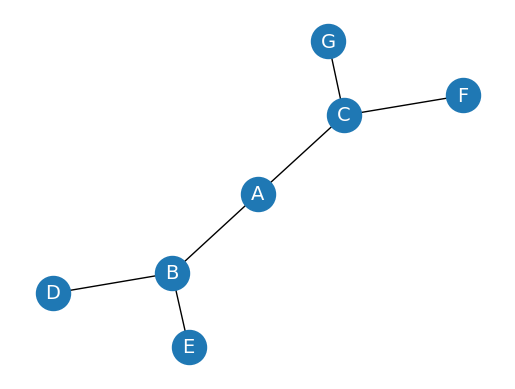

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

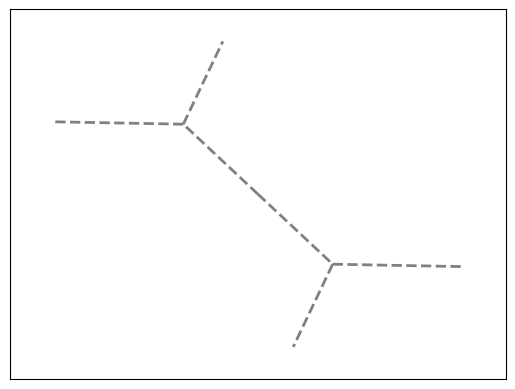

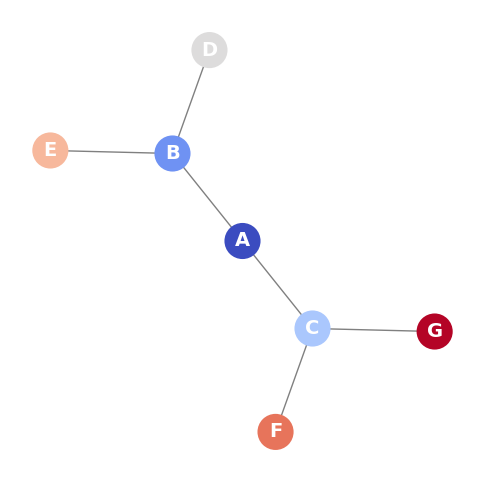

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray', style='dashed')

# Generate positions for the nodes
# pos = nx.spring_layout(G, seed=0)
# Use Kamada-Kawai layout for better spacing
pos = nx.kamada_kawai_layout(G)

# Set unique colors for each node (optional, here using range(len(G.nodes)) for mapping)
node_colors = range(len(G.nodes))

# Draw the graph with improved visualization
plt.figure(figsize=(6, 6))  # Set figure size
plt.axis('off')  # Remove axis for cleaner visualization

nx.draw_networkx(G,
                 pos=pos,
                 node_size=600,
                 node_color=node_colors,  # Apply colors
                 cmap=plt.cm.coolwarm,  # Apply colormap
                 edge_color='gray',  # Use gray for better contrast
                 linewidths=1.5,  # Adjust node border thickness
                 font_size=14,
                 font_color='white',
                 font_weight='bold')

plt.show()

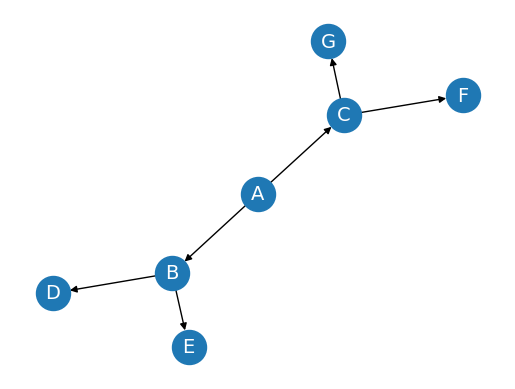

In [2]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

plt.axis('off')
nx.draw_networkx(DG,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

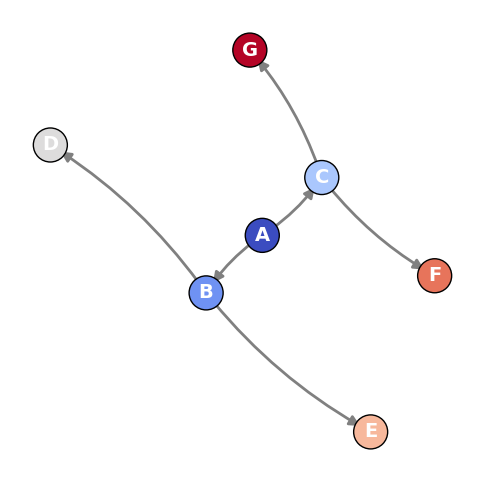

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

# Generate positions for the nodes
pos = nx.spring_layout(DG, seed=0)  # Use a consistent layout

# Set unique colors for each node
node_colors = range(len(DG.nodes))

# Create figure
plt.figure(figsize=(6, 6))  # Set figure size
plt.axis('off')  # Remove axis for cleaner visualization

# Draw nodes
nx.draw_networkx_nodes(DG, pos, node_size=600, node_color=node_colors, cmap=plt.cm.coolwarm, edgecolors='black')

# Draw edges with arrows
nx.draw_networkx_edges(DG, pos, edge_color='gray', width=2, arrows=True, arrowsize=15, connectionstyle="arc3,rad=0.1")

# Draw node labels
nx.draw_networkx_labels(DG, pos, font_size=14, font_color='white', font_weight='bold')

# Show plot
plt.show()

# **Understanding Node Distances in `spring_layout`**

## 🔍 **Why Do Higher Weights Lead to Shorter Distances?**
1. **Spring Layout (`nx.spring_layout`)** is a **force-directed algorithm** that **simulates physics**:
   - **Edges act like springs**, pulling connected nodes together.
   - **Higher edge weights** represent **stronger springs**, pulling nodes **closer**.
   - **Lower edge weights** mean **weaker springs**, allowing nodes to be **further apart**.

2. **How Edge Weights Affect Distance**:
   - `spring_layout` **interprets weights inversely**:
     - **Higher weight → Stronger attraction → Shorter distance** ❌ (Not intuitive for weighted graphs)
     - **Lower weight → Weaker attraction → Longer distance**

## 🛠 **How to Fix This?**
If you want **higher weights to increase distances**, you need to **invert the weight values**:

```python
# Invert weights for a more intuitive layout
pos = nx.spring_layout(WG, seed=0, weight=[1 / WG[u][v]["weight"] for u, v in WG.edges()])

{('A', 'B'): Text(-0.17062897224300366, -0.2578513560983575, '10'),
 ('A', 'C'): Text(0.1690871167597765, 0.25843018611299007, '20'),
 ('B', 'D'): Text(-0.5751300482618783, -0.5819109500526888, '30'),
 ('B', 'E'): Text(-0.30708797484122186, -0.7577037926506119, '40'),
 ('C', 'F'): Text(0.5743062636738074, 0.5815239970648829, '50'),
 ('C', 'G'): Text(0.3081456694549718, 0.7582993720664115, '60')}

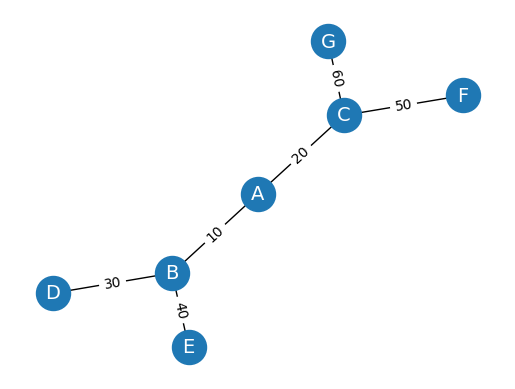

In [3]:
WG = nx.Graph()
WG.add_edges_from([('A', 'B', {"weight": 10}), ('A', 'C', {"weight": 20}), ('B', 'D', {"weight": 30}), ('B', 'E', {"weight": 40}), ('C', 'F', {"weight": 50}), ('C', 'G', {"weight": 60})])
labels = nx.get_edge_attributes(WG, "weight")

plt.axis('off')
nx.draw_networkx(WG,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
nx.draw_networkx_edge_labels(WG, pos=nx.spring_layout(G, seed=0), edge_labels=labels)

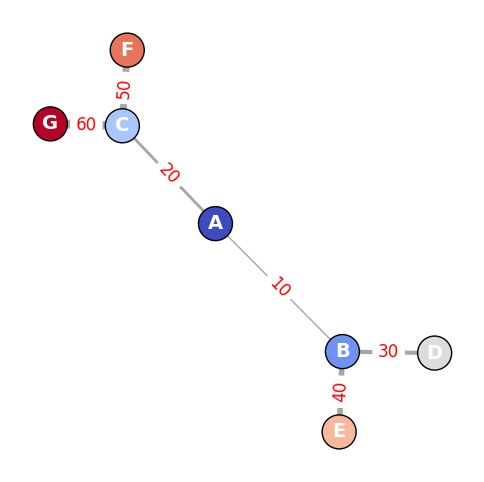

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a weighted undirected graph
WG = nx.Graph()
WG.add_edges_from([
    ('A', 'B', {"weight": 10}),
    ('A', 'C', {"weight": 20}),
    ('B', 'D', {"weight": 30}),
    ('B', 'E', {"weight": 40}),
    ('C', 'F', {"weight": 50}),
    ('C', 'G', {"weight": 60})
])

# Generate positions for the nodes
pos = nx.spring_layout(WG, seed=0)

# Extract edge weights for labeling
labels = nx.get_edge_attributes(WG, "weight")

# Create figure
plt.figure(figsize=(6, 6))  # Set figure size
plt.axis('off')  # Remove axis for cleaner visualization

# Draw nodes with colors
node_colors = range(len(WG.nodes))
nx.draw_networkx_nodes(WG, pos, node_size=600, node_color=node_colors, cmap=plt.cm.coolwarm, edgecolors='black')

# Draw edges with varying thickness based on weight
edge_widths = [WG[u][v]["weight"] / 10 for u, v in WG.edges()]  # Normalize weights
nx.draw_networkx_edges(WG, pos, width=edge_widths, edge_color='gray', alpha=0.7)

# Draw node labels
nx.draw_networkx_labels(WG, pos, font_size=14, font_color='white', font_weight='bold')

# Draw edge labels (weights)
nx.draw_networkx_edge_labels(WG, pos, edge_labels=labels, font_size=12, font_color='red')

# Show plot
plt.show()

In [4]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
print(f"Is graph 1 connected? {nx.is_connected(G1)}")

G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
print(f"Is graph 2 connected? {nx.is_connected(G2)}")

Is graph 1 connected? False
Is graph 2 connected? True


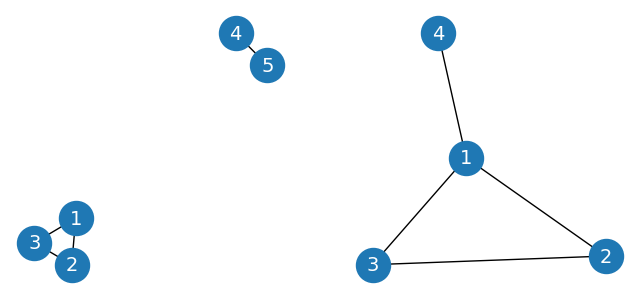

In [5]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.axis('off')
nx.draw_networkx(G1,
                 pos=nx.spring_layout(G1, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
plt.subplot(222)
plt.axis('off')
nx.draw_networkx(G2,
                 pos=nx.spring_layout(G2, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

notes inside plotting

Is graph 1 connected? False
Is graph 2 connected? True


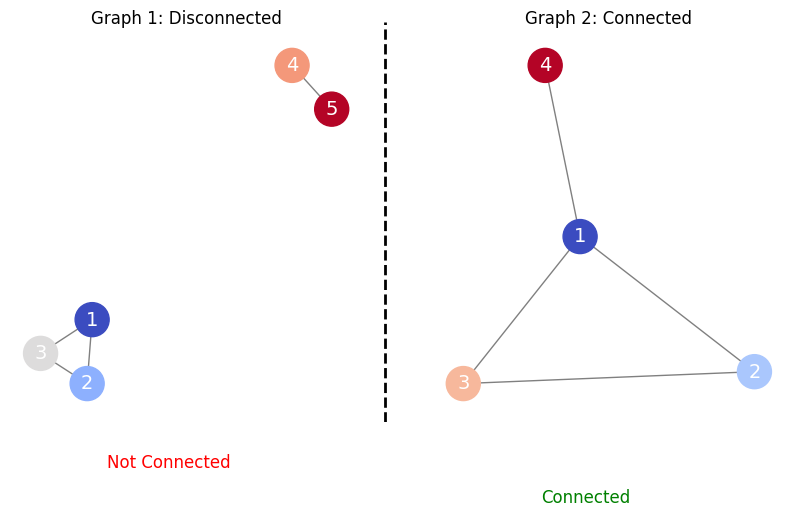

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create Graph 1 (G1) - Disconnected Graph
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])  # Two disconnected components
print(f"Is graph 1 connected? {nx.is_connected(G1)}")  # Expected: False

# Create Graph 2 (G2) - Connected Graph
G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])  # All nodes are connected
print(f"Is graph 2 connected? {nx.is_connected(G2)}")  # Expected: True

# Define layout for both graphs (consistent positioning)
pos_G1 = nx.spring_layout(G1, seed=0)  # Fix layout to maintain consistency
pos_G2 = nx.spring_layout(G2, seed=0)

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create two side-by-side plots

# --- Plot Graph 1 (Disconnected Graph) ---
axes[0].set_title("Graph 1: Disconnected")  # Title for G1
axes[0].axis('off')  # Hide axis

# Draw Graph 1
nx.draw_networkx(G1,
                 pos=pos_G1,
                 ax=axes[0],  # Specify the axis
                 node_size=600,
                 node_color=range(len(G1.nodes)),  # Color gradient based on nodes
                 cmap=plt.cm.coolwarm,  # Apply colormap
                 edge_color='gray',  # Use gray edges for better contrast
                 font_size=14,
                 font_color='white')

# Add a note inside the plot
axes[0].text(0, -1.2, "Not Connected", fontsize=12, color="red", ha="center")

# --- Plot Graph 2 (Connected Graph) ---
axes[1].set_title("Graph 2: Connected")  # Title for G2
axes[1].axis('off')  # Hide axis

# Draw Graph 2
nx.draw_networkx(G2,
                 pos=pos_G2,
                 ax=axes[1],  # Specify the axis
                 node_size=600,
                 node_color=range(len(G2.nodes)),  # Color gradient
                 cmap=plt.cm.coolwarm,  # Colormap
                 edge_color='gray',
                 font_size=14,
                 font_color='white')

# Add a note inside the plot
axes[1].text(0, -1.2, "Connected", fontsize=12, color="green", ha="center")

# Add a vertical line between the two graphs
divider = fig.add_axes([0.495, 0.1, 0.01, 0.8])  # (left, bottom, width, height)
divider.set_xticks([])
divider.set_yticks([])
divider.set_frame_on(False)  # Remove background
divider.axvline(x=0.5, color='black', linestyle='--', linewidth=2)

# Show the plots
plt.show()


In [3]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
print(f"deg(A) = {G.degree['A']}")

DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
print(f"deg^-(A) = {DG.in_degree['A']}")
print(f"deg^+(A) = {DG.out_degree['A']}")

deg(A) = 2
deg^-(A) = 0
deg^+(A) = 2


In [4]:
print(f"Degree centrality      = {nx.degree_centrality(G)}")
print(f"Closeness centrality   = {nx.closeness_centrality(G)}")
print(f"Betweenness centrality = {nx.betweenness_centrality(G)}")

Degree centrality      = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness centrality   = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


In [5]:
adj = [[0,1,1,0,0,0,0],
       [1,0,0,1,1,0,0],
       [1,0,0,0,0,1,1],
       [0,1,0,0,0,0,0],
       [0,1,0,0,0,0,0],
       [0,0,1,0,0,0,0],
       [0,0,1,0,0,0,0]]

edge_list = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)]

adj_list = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5, 6],
    3: [1],
    4: [1],
    5: [2],
    6: [2]
}

In [6]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

def bfs(graph, node):
    visited, queue = [node], [node]

    while queue:
        node = queue.pop(0)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)

    return visited

bfs(G, 'A')

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [7]:
visited = []

def dfs(visited, graph, node):
    if node not in visited:
        visited.append(node)
        for neighbor in graph[node]:
            visited = dfs(visited, graph, neighbor)

    return visited

dfs(visited, G, 'A')

['A', 'B', 'D', 'E', 'C', 'F', 'G']